In [ ]:
#Bring in datasets

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import csv

In [98]:
# Create deaths dataframe
deaths_df = pd.read_csv('cleaned_death_by_county.csv')
deaths_df.drop_duplicates()
deaths_df

,countyFIPS,County Name,State,County_State,Deaths as of October 19 2020
0,36047,Kings County,NY,"Kings County, NY",7372
1,36081,Queens County,NY,"Queens County, NY",7288
2,6037,Los Angeles County,CA,"Los Angeles County, CA",6877
3,17031,Cook County,IL,"Cook County, IL",5364
4,36005,Bronx County,NY,"Bronx County, NY",4979
...,...,...,...,...,...
3131,56009,Converse County,WY,"Converse County, WY",0
3132,56011,Crook County,WY,"Crook County, WY",0
3133,56017,Hot Springs County,WY,"Hot Springs County, WY",0
3134,56027,Niobrara County,WY,"Niobrara County, WY",0


In [99]:
# Create food deserts dataframe
deserts_df = pd.read_csv('cleaned_food_access_data.csv')
deserts_df.drop_duplicates()
deserts_df

,countyFIPS,State,County_State,Percent_1_10,Average_Poverty
0,1001,AL,"Autauga County, AL",0.325322,-86.646440
1,1003,AL,"Baldwin County, AL",0.096774,14.358065
2,1005,AL,"Barbour County, AL",0.333333,24.533333
3,1007,AL,"Bibb County, AL",0.000000,16.025000
4,1009,AL,"Blount County, AL",0.000000,17.911111
...,...,...,...,...,...
3131,56037,WY,"Sweetwater County, WY",0.000000,11.841667
3132,56039,WY,"Teton County, WY",0.000000,8.100000
3133,56041,WY,"Uinta County, WY",0.000000,14.166667
3134,56043,WY,"Washakie County, WY",0.000000,14.133333


In [100]:
# Bring in lat lon dataframe
coord_df=pd.read_csv("lat_lon_county.csv",encoding='ISO-8859-1')
coord_df

,countyFIPS,State,County,County_State,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,Latitude,Longitude
0,1001,AL,Autauga County,"Autauga County, AL",1.539602e+09,25706961,594.444,9.926,32.532237,-86.646440
1,1003,AL,Baldwin County,"Baldwin County, AL",4.117622e+09,1132980868,1589.823,437.446,30.659218,-87.746067
2,1005,AL,Barbour County,"Barbour County, AL",2.292160e+09,50523213,885.008,19.507,31.870253,-85.405104
3,1007,AL,Bibb County,"Bibb County, AL",1.612167e+09,9602089,622.461,3.707,33.015893,-87.127148
4,1009,AL,Blount County,"Blount County, AL",1.670104e+09,15015467,644.831,5.798,33.977358,-86.566440
...,...,...,...,...,...,...,...,...,...,...
3131,56037,WY,Sweetwater County,"Sweetwater County, WY",2.700575e+10,166230252,10426.980,64.182,41.660328,-108.875677
3132,56039,WY,Teton County,"Teton County, WY",1.035178e+10,570864879,3996.846,220.412,44.048662,-110.426087
3133,56041,WY,Uinta County,"Uinta County, WY",5.391632e+09,16625817,2081.721,6.419,41.284726,-110.558947
3134,56043,WY,Washakie County,"Washakie County, WY",5.798139e+09,10429604,2238.674,4.027,43.878831,-107.669052


In [101]:
#Create 1 clean data set

In [102]:
merge1_df = pd.merge(coord_df, deserts_df, on="County_State", how="outer")
merge1_df.dropna()
merge1_df.drop_duplicates()
merge1_df

,countyFIPS_x,State_x,County,County_State,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,Latitude,Longitude,countyFIPS_y,State_y,Percent_1_10,Average_Poverty
0,1001,AL,Autauga County,"Autauga County, AL",1.539602e+09,25706961,594.444,9.926,32.532237,-86.646440,1001,AL,0.325322,-86.646440
1,1003,AL,Baldwin County,"Baldwin County, AL",4.117622e+09,1132980868,1589.823,437.446,30.659218,-87.746067,1003,AL,0.096774,14.358065
2,1005,AL,Barbour County,"Barbour County, AL",2.292160e+09,50523213,885.008,19.507,31.870253,-85.405104,1005,AL,0.333333,24.533333
3,1007,AL,Bibb County,"Bibb County, AL",1.612167e+09,9602089,622.461,3.707,33.015893,-87.127148,1007,AL,0.000000,16.025000
4,1009,AL,Blount County,"Blount County, AL",1.670104e+09,15015467,644.831,5.798,33.977358,-86.566440,1009,AL,0.000000,17.911111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,56037,WY,Sweetwater County,"Sweetwater County, WY",2.700575e+10,166230252,10426.980,64.182,41.660328,-108.875677,56037,WY,0.000000,11.841667
3132,56039,WY,Teton County,"Teton County, WY",1.035178e+10,570864879,3996.846,220.412,44.048662,-110.426087,56039,WY,0.000000,8.100000
3133,56041,WY,Uinta County,"Uinta County, WY",5.391632e+09,16625817,2081.721,6.419,41.284726,-110.558947,56041,WY,0.000000,14.166667
3134,56043,WY,Washakie County,"Washakie County, WY",5.798139e+09,10429604,2238.674,4.027,43.878831,-107.669052,56043,WY,0.000000,14.133333


In [103]:
is_NaN = merge1_df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = merge1_df[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [countyFIPS_x, State_x, County, County_State, ALAND, AWATER, ALAND_SQMI, AWATER_SQMI, Latitude, Longitude, countyFIPS_y, State_y, Percent_1_10, Average_Poverty]
Index: []


In [104]:
merge2_df = pd.merge(merge1_df, deaths_df, on="County_State", how="outer")
merge2_df.dropna()
merge2_df

,countyFIPS_x,State_x,County,County_State,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,Latitude,Longitude,countyFIPS_y,State_y,Percent_1_10,Average_Poverty,countyFIPS,County Name,State,Deaths as of October 19 2020
0,1001,AL,Autauga County,"Autauga County, AL",1.539602e+09,25706961,594.444,9.926,32.532237,-86.646440,1001,AL,0.325322,-86.646440,1001,Autauga County,AL,28
1,1003,AL,Baldwin County,"Baldwin County, AL",4.117622e+09,1132980868,1589.823,437.446,30.659218,-87.746067,1003,AL,0.096774,14.358065,1003,Baldwin County,AL,67
2,1005,AL,Barbour County,"Barbour County, AL",2.292160e+09,50523213,885.008,19.507,31.870253,-85.405104,1005,AL,0.333333,24.533333,1005,Barbour County,AL,9
3,1007,AL,Bibb County,"Bibb County, AL",1.612167e+09,9602089,622.461,3.707,33.015893,-87.127148,1007,AL,0.000000,16.025000,1007,Bibb County,AL,13
4,1009,AL,Blount County,"Blount County, AL",1.670104e+09,15015467,644.831,5.798,33.977358,-86.566440,1009,AL,0.000000,17.911111,1009,Blount County,AL,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,56037,WY,Sweetwater County,"Sweetwater County, WY",2.700575e+10,166230252,10426.980,64.182,41.660328,-108.875677,56037,WY,0.000000,11.841667,56037,Sweetwater County,WY,2
3132,56039,WY,Teton County,"Teton County, WY",1.035178e+10,570864879,3996.846,220.412,44.048662,-110.426087,56039,WY,0.000000,8.100000,56039,Teton County,WY,1
3133,56041,WY,Uinta County,"Uinta County, WY",5.391632e+09,16625817,2081.721,6.419,41.284726,-110.558947,56041,WY,0.000000,14.166667,56041,Uinta County,WY,2
3134,56043,WY,Washakie County,"Washakie County, WY",5.798139e+09,10429604,2238.674,4.027,43.878831,-107.669052,56043,WY,0.000000,14.133333,56043,Washakie County,WY,7


In [105]:
is_NaN = merge2_df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = merge2_df[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [countyFIPS_x, State_x, County, County_State, ALAND, AWATER, ALAND_SQMI, AWATER_SQMI, Latitude, Longitude, countyFIPS_y, State_y, Percent_1_10, Average_Poverty, countyFIPS, County Name, State, Deaths as of October 19 2020]
Index: []


In [113]:
#Remove Cities that are not "extreme" food desserts
extreme_df=merge2_df.loc[merge2_df["Percent_1_10"]>.25]
# Create a reference the CSV file desired
csv_path = "output_data_deserts_deaths.csv"
extreme_df.to_csv('output_data_deserts_deaths.csv', index=False, encoding='utf-8')

print (extreme_df)

      countyFIPS_x State_x           County         County_State  \
0             1001      AL   Autauga County   Autauga County, AL   
2             1005      AL   Barbour County   Barbour County, AL   
5             1011      AL   Bullock County   Bullock County, AL   
6             1013      AL    Butler County    Butler County, AL   
8             1017      AL  Chambers County  Chambers County, AL   
...            ...     ...              ...                  ...   
3113         56001      WY    Albany County    Albany County, WY   
3116         56007      WY    Carbon County    Carbon County, WY   
3120         56015      WY    Goshen County    Goshen County, WY   
3123         56021      WY   Laramie County   Laramie County, WY   
3128         56031      WY    Platte County    Platte County, WY   

             ALAND     AWATER  ALAND_SQMI  AWATER_SQMI   Latitude   Longitude  \
0     1.539602e+09   25706961     594.444        9.926  32.532237  -86.646440   
2     2.292160e+09   

In [107]:
def linear_regression_plot(x_values, y_values, title, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel("% Population in Food Desert")
    plt.ylabel("Deaths")
    print(f"The r value is: {round(rvalue,2)}")
    plt.show()

The r value is: -0.16


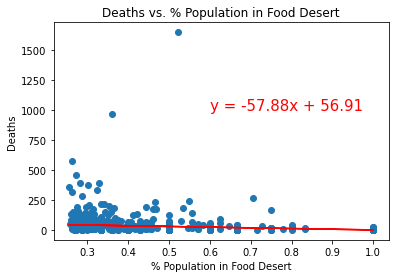

In [108]:
linear_regression_plot(extreme_df["Percent_1_10"],extreme_df["Deaths as of October 19 2020"],"Deaths vs. % Population in Food Desert",(.6,1000))